## Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions 

#### Note 
1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

##### Insights to be drawn -
* Get all Pokemons whose spawn rate is less than 5%
* Get all Pokemons that have less than 4 weaknesses
* Get all Pokemons that have no multipliers at all
* Get all Pokemons that do not have more than 2 evolutions
* Get all Pokemons whose spawn time is less than 300 seconds.

**Note-** spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

* Get all Pokemon who have more than two types of capabilities

In [2]:
## required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import ast

In [3]:
# read the excel file
df = pd.read_excel('pokemon_data.xlsx')
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


In [73]:
# Shape of the data
df.shape

(151, 17)

In [74]:
# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    int64  
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    object 
 6   weight          151 non-null    object 
 7   candy           151 non-null    object 
 8   candy_count     70 non-null     float64
 9   egg             151 non-null    object 
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    float64
 12  spawn_time      145 non-null    object 
 13  multipliers     70 non-null     object 
 14  weaknesses      151 non-null    object 
 15  next_evolution  70 non-null     object 
 16  prev_evolution  72 non-null     object 
dtypes: float64(3), int64(2), object(12)

###  Prob_1:- Get all Pokemons whose spawn rate is less than 5%

In [75]:
#checking into data whether spawn rate is less than 5% available or not
df_prob1 = df[df['avg_spawns'] < 5]
df_prob1.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"['Fire', 'Flying']",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,NaN,"['Water', 'Electric', 'Rock']",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':..."
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,['Water'],0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,0.0340,3.40,07:02,[1.4],"['Electric', 'Grass']","[{'num': '009', 'name': 'Blastoise'}]","[{'num': '007', 'name': 'Squirtle'}]"


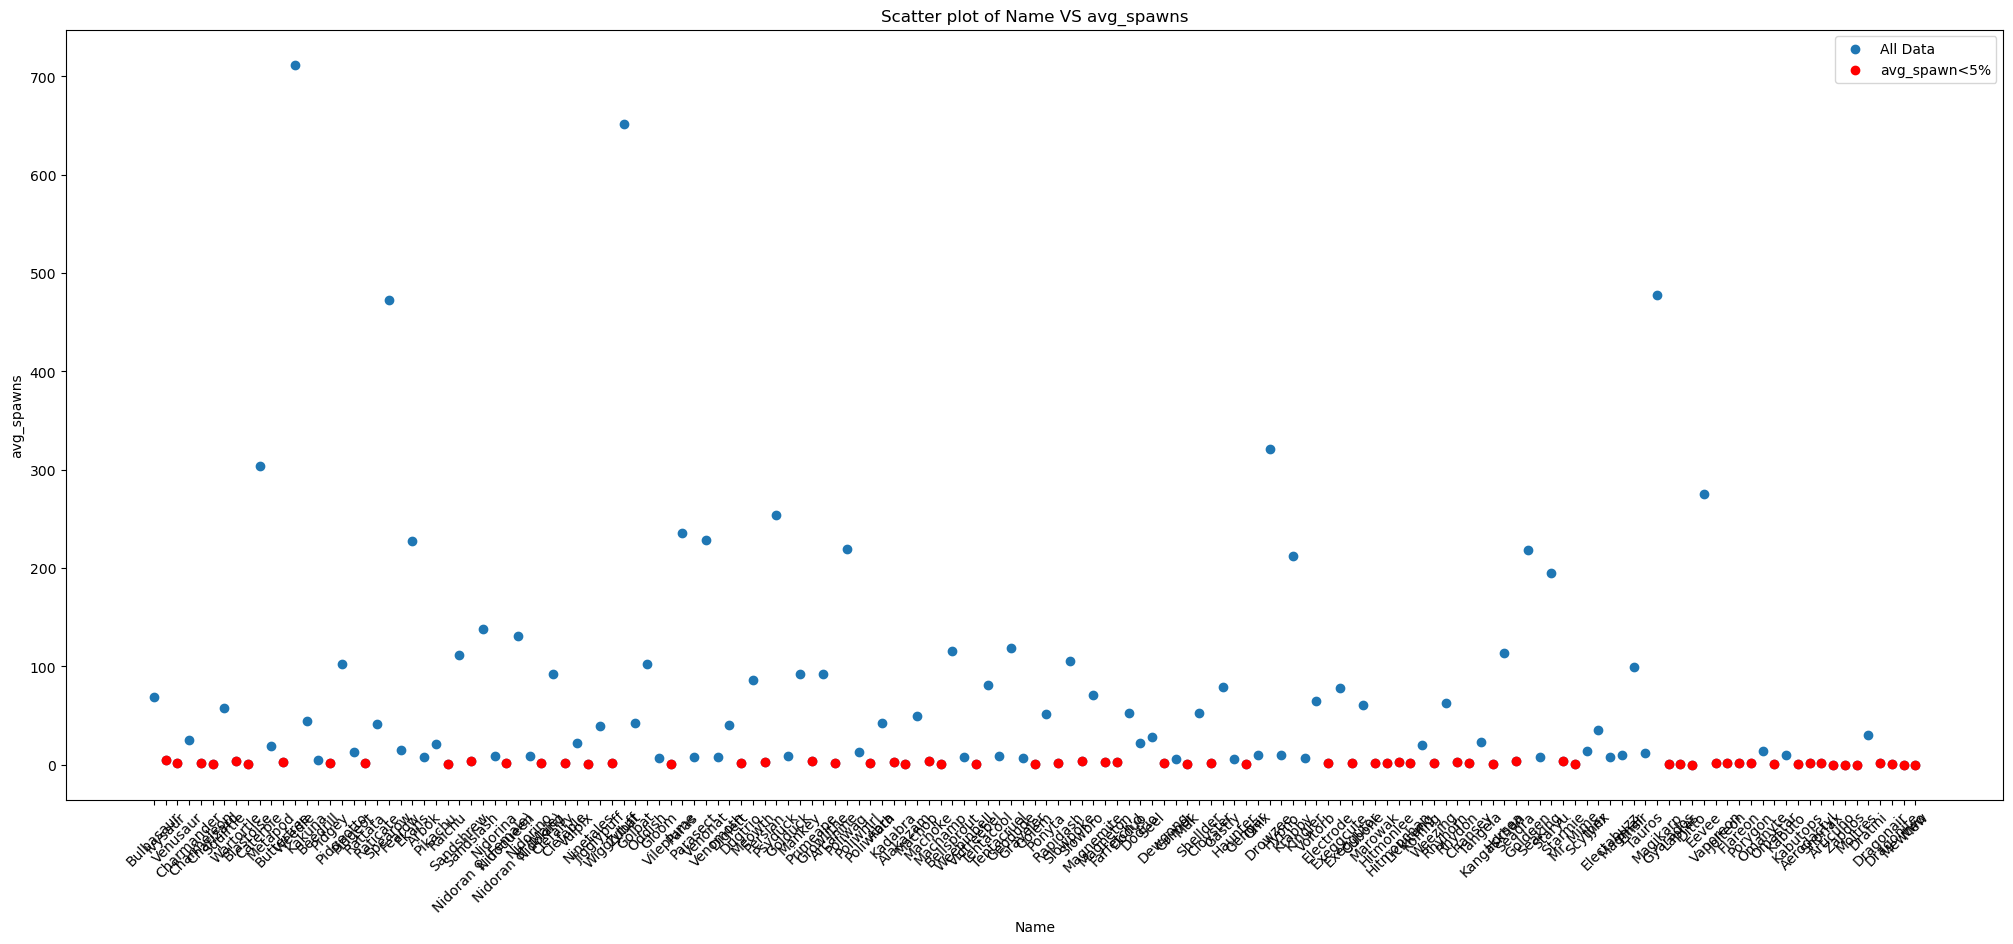

In [76]:
# Graph plot of avg_spawns<5% and all avg_spawn
plt.figure(figsize=(25,10))
plt.scatter(df['name'], df['avg_spawns'], label='All Data')
plt.scatter(df_prob1['name'], df_prob1['avg_spawns'], color='red', label='avg_spawn<5%')
plt.xlabel('Name')
plt.ylabel('avg_spawns')
plt.title('Scatter plot of Name VS avg_spawns')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [77]:
# pokemons who have less than 5% avg_spawns
df_prob1[['name','avg_spawns']]

,name,avg_spawns
1,Ivysaur,4.20
2,Venusaur,1.70
4,Charmeleon,1.20
5,Charizard,0.31
7,Wartortle,3.40
...,...,...
145,Moltres,0.00
147,Dragonair,2.00
148,Dragonite,0.11
149,Mewtwo,0.00


#### Conclusion:-
There are 67 pokemons whose spawn rate is less than 5%

### Prob_2:- Get all Pokemons that have less than 4 weaknesses

In [78]:
# Converting from string to list
df['weaknesses'] = df['weaknesses'].apply(lambda x: ast.literal_eval(x))

In [79]:
# Creating additional feature where the length of the list will be stored
df['weaknesses_length'] = df['weaknesses'].str.len()

In [80]:
# Showing first 5 rows
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknesses_length
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3


In [81]:
# checking in the data whether weaknesses_length<4 is available or not
df_prob2 = df[df['weaknesses_length']<4]

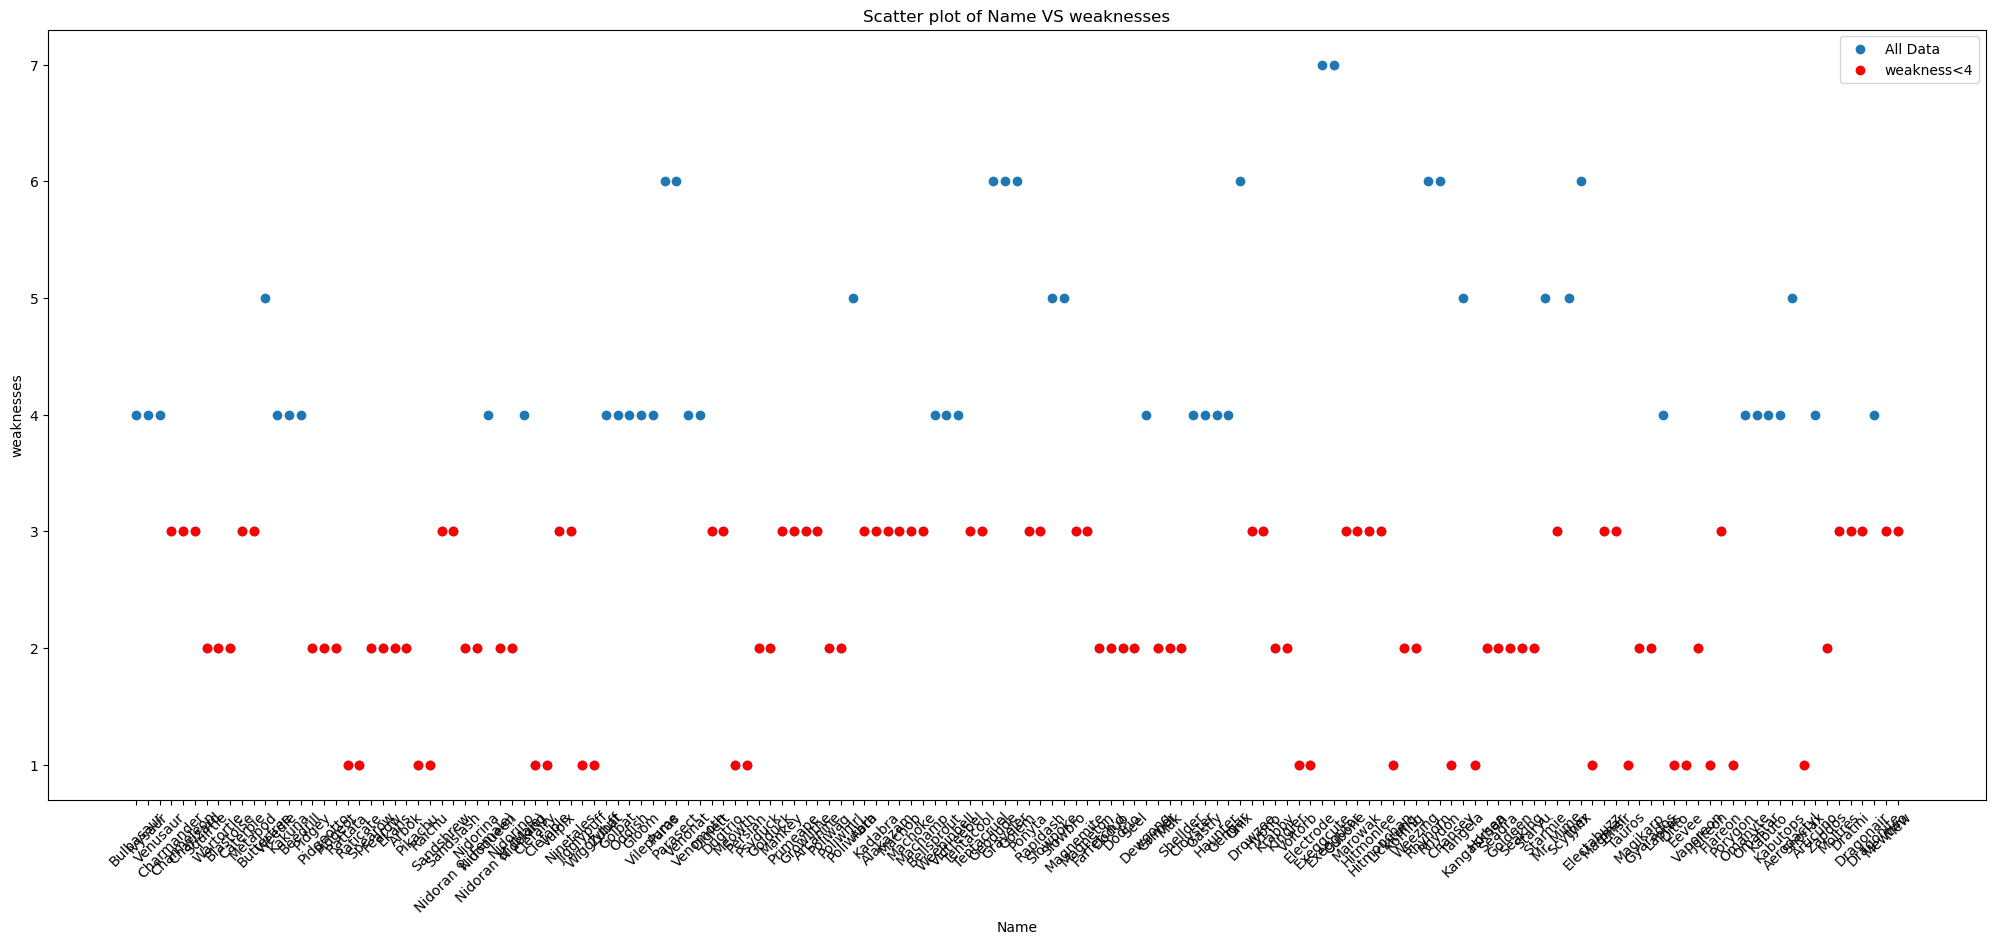

In [82]:
# Graph plot of weakness length<4 and all weakness length
plt.figure(figsize=(25,10))
plt.scatter(df['name'], df['weaknesses_length'], label='All Data')
plt.scatter(df_prob2['name'], df_prob2['weaknesses_length'], color='red', label='weakness<4')
plt.xlabel('Name')
plt.ylabel('weaknesses')
plt.title('Scatter plot of Name VS weaknesses')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [83]:
# pokemons who have weaknesses length less than 4
df_prob2[['name','weaknesses']]

,name,weaknesses
3,Charmander,"[Water, Ground, Rock]"
4,Charmeleon,"[Water, Ground, Rock]"
5,Charizard,"[Water, Electric, Rock]"
6,Squirtle,"[Electric, Grass]"
7,Wartortle,"[Electric, Grass]"
...,...,...
145,Moltres,"[Water, Electric, Rock]"
146,Dratini,"[Ice, Dragon, Fairy]"
147,Dragonair,"[Ice, Dragon, Fairy]"
149,Mewtwo,"[Bug, Ghost, Dark]"


#### Conclusion:
There are 102 pokemons who have less than 4 weaknesses

### Prob_3:- Get all Pokemons that have no multipliers at all

In [84]:
# Checking Pokemons who have NaN multipliers
df_prob3 = df[df['multipliers'].isna()]

In [85]:
# Pokemons name who have NaN multipliers
df_prob3[['name','multipliers']]

,name,multipliers
2,Venusaur,NaN
5,Charizard,NaN
8,Blastoise,NaN
11,Butterfree,NaN
14,Beedrill,NaN
...,...,...
144,Zapdos,NaN
145,Moltres,NaN
148,Dragonite,NaN
149,Mewtwo,NaN


#### Conclusion:
There are 81 pokemons that have no multipliers at all

### Prob_4:- Get all Pokemons that do not have more than 2 evolutions

In [86]:
# showing first five records
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknesses_length
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3


In [87]:
# converting from string to list
df['next_evolution'] = df['next_evolution'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else 0)

In [88]:
# converting from string to list
df['prev_evolution'] = df['prev_evolution'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else 0)

In [89]:
# creating length of next_evolution and prev_evolution column
df['next_evolution_len'] = df['next_evolution'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['prev_evolution_len'] = df['prev_evolution'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [90]:
# creating total_evolution_len column
df['total_evolution_len'] = df['next_evolution_len'] + df['prev_evolution_len']

In [94]:
# checking in the data whether total_evolution_len is less than 2 or not
df_prob4 = df[df['total_evolution_len'] <= 2]

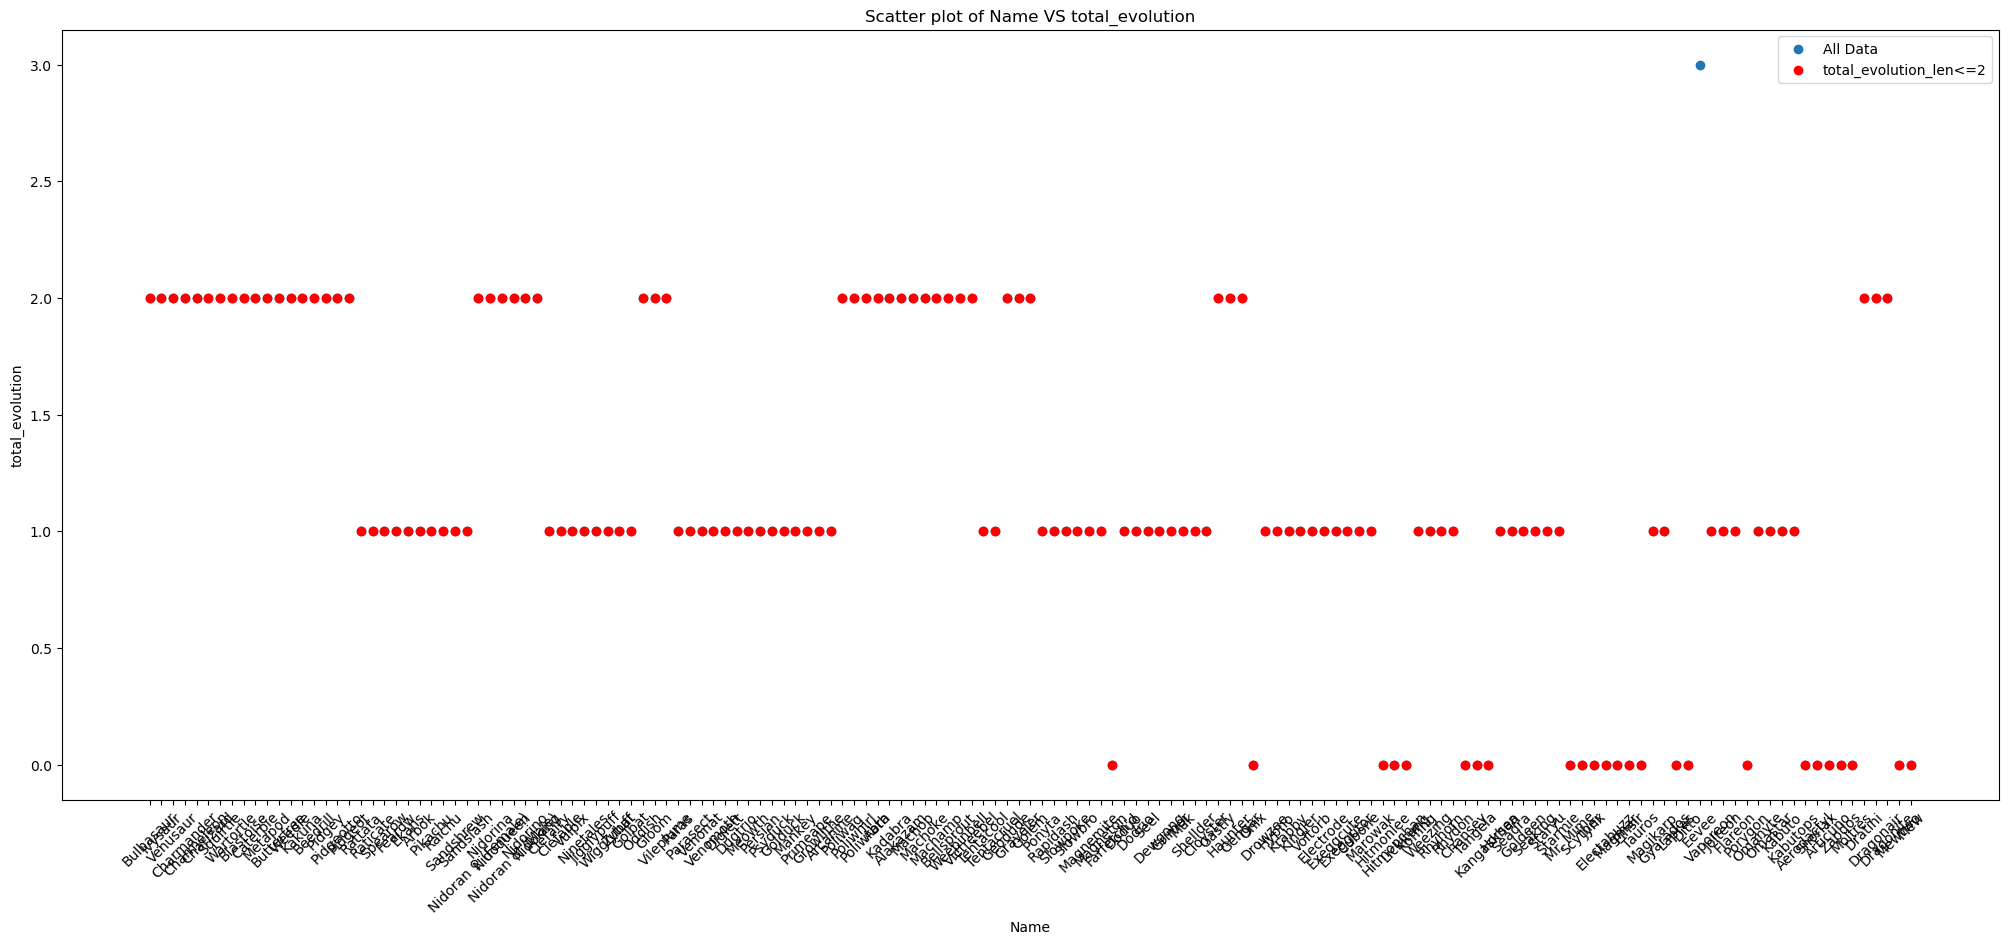

In [95]:
# graph plot of name and total_evolution_len
plt.figure(figsize=(25,10))
plt.scatter(df['name'], df['total_evolution_len'], label='All Data')
plt.scatter(df_prob4['name'], df_prob4['total_evolution_len'], color='red', label='total_evolution_len<=2')
plt.xlabel('Name')
plt.ylabel('total_evolution')
plt.title('Scatter plot of Name VS total_evolution')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [98]:
# data in which total_evolution_len > 2
df[df['total_evolution_len'] > 2]

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknesses_length,next_evolution_len,prev_evolution_len,total_evolution_len
132,133,133,Eevee,http://www.serebii.net/pokemongo/pokemon/133.png,['Normal'],0.30 m,6.5 kg,Eevee Candy,25.0,10 km,...,275.0,05:32,"[2.02, 2.64]",[Fighting],"[{'num': '134', 'name': 'Vaporeon'}, {'num': '...",0,1,3,0,3


#### Conclusion
Only one pokemon have more than 2 evolution

### Prob_5:- Get all Pokemons whose spawn time is less than 300 seconds

In [1]:
# Function to convert minute into second
def convert_into_sec(spawn_time):
    spawn_time = str(spawn_time).split(':')
    spawn_time = int(spawn_time[0])*60 + int(spawn_time[1])
    return spawn_time

In [4]:
# converting the time value from minute_second to second
df['spawn_time'] = df['spawn_time'].apply(lambda x: convert_into_sec(x) if pd.notna(x) else np.nan)

In [9]:
# check in the data pokemons who have less than 300 seconds spawn_time
df_prob5 = df[df['spawn_time'] < 300]

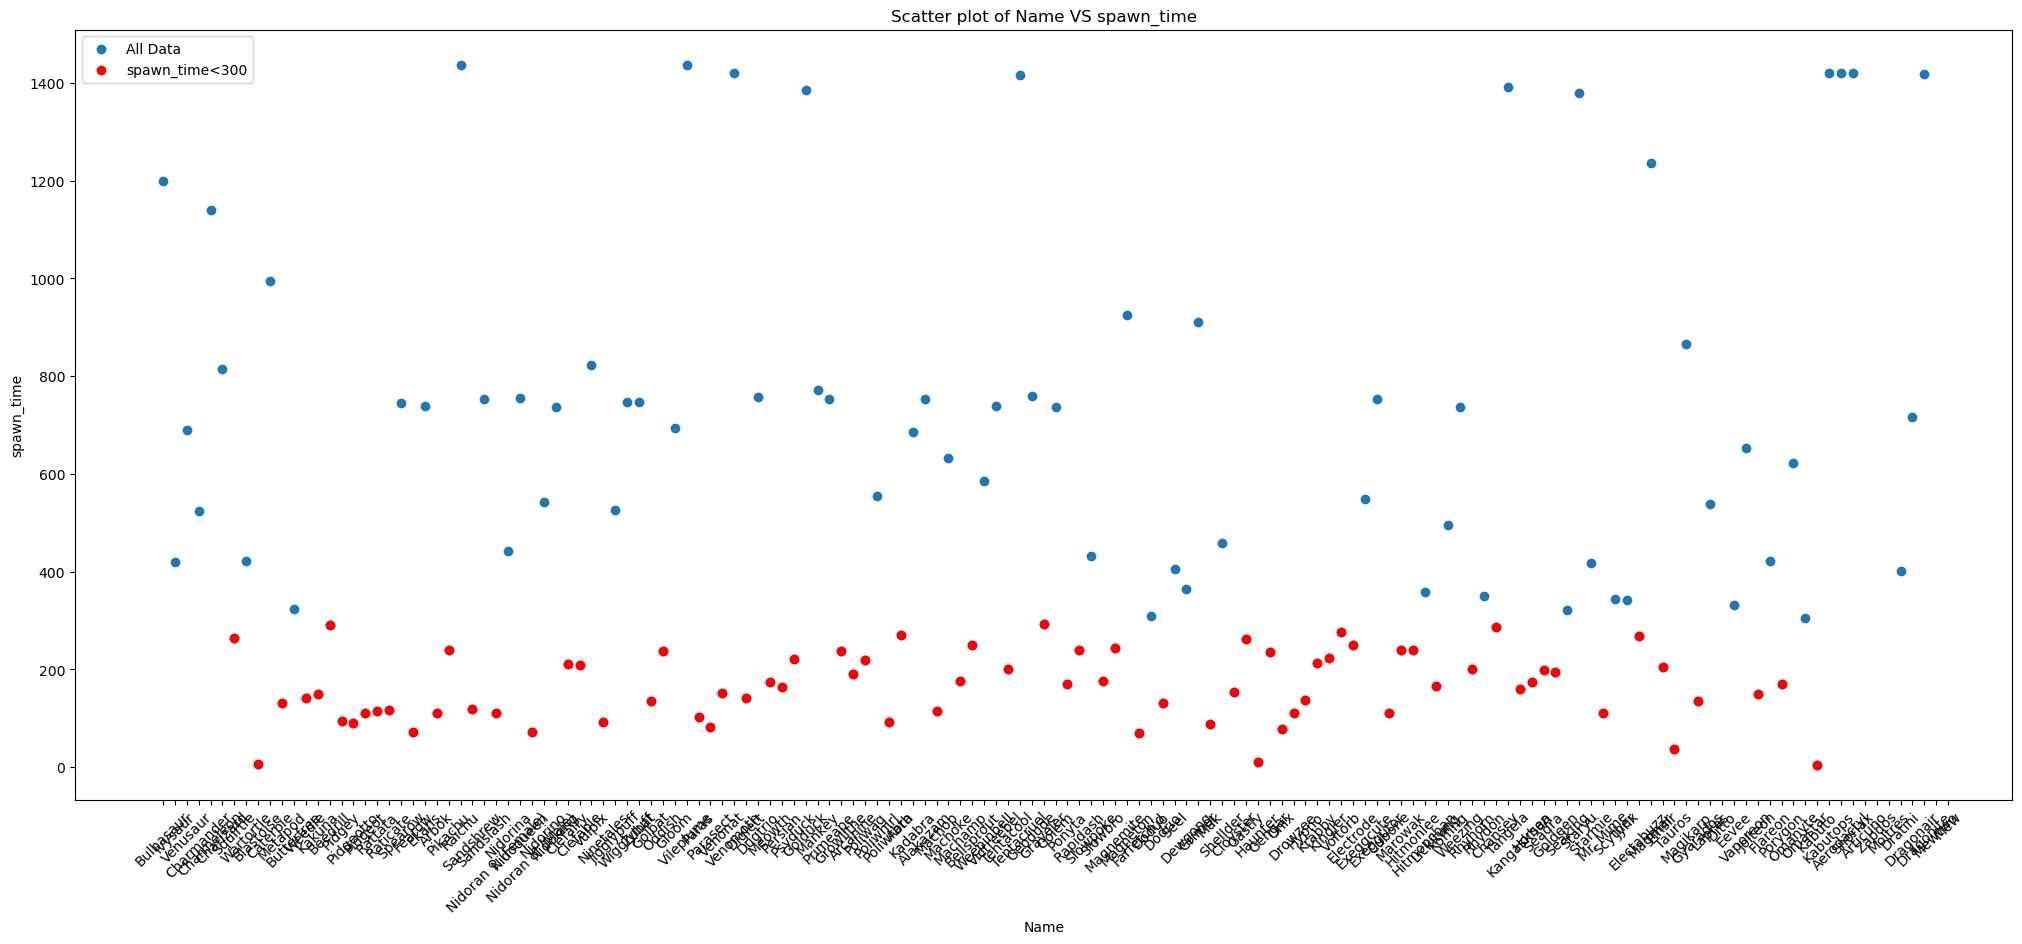

In [10]:
# Graph plot of all spawn_time and spawn_time<300
plt.figure(figsize=(25,10))
plt.scatter(df['name'], df['spawn_time'], label='All Data')
plt.scatter(df_prob5['name'], df_prob5['spawn_time'], color='red', label='spawn_time<300')
plt.xlabel('Name')
plt.ylabel('spawn_time')
plt.title('Scatter plot of Name VS spawn_time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [11]:
# showing name whose spawn_time<300
df_prob5[['name','spawn_time']]

,name,spawn_time
6,Squirtle,265.0
8,Blastoise,6.0
10,Metapod,131.0
12,Weedle,141.0
13,Kakuna,150.0
...,...,...
127,Tauros,37.0
129,Gyarados,135.0
134,Jolteon,150.0
136,Porygon,169.0


#### Conclusion
There are total 75 Pokemons whose spawn_time is less than 300

### Prob_6:- Get all Pokemon who have more than two types of capabilities

In [12]:
# converting from string to list
df['type'] = df['type'].apply(lambda x: ast.literal_eval(x))

In [13]:
# creating additional features where length of the features will be stored
df['type_length'] = df['type'].str.len()

In [16]:
# showing data where type_length>2
df[df['type_length'] > 2]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,type_length


#### Conclusion
There are not any pokemons who have more than two type of capabilities